### 1. La mudanza

Estás harto del postureo en California y quieres mudarte de Estado. Aún no te has decidido y necesitas conocer qué estados son más similares en cuanto a seguridad y habitantes


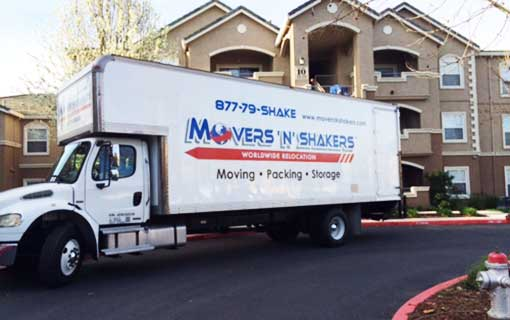



In [1]:
import numpy as np
import seaborn as sns


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [2]:
import pandas as pd
datos = pd.read_csv('data_clustering/USArrests.csv',index_col='State')
datos

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
stan =StandardScaler()
datos2=stan.fit_transform(datos)

**1.1** Utilizando la función `pairwise_distances` de sklearn calcula la distancia entre todos los estados. ¿Cuáles son los dos más diferentes?

In [4]:
from sklearn.metrics import pairwise_distances
X=datos2
pwd = pairwise_distances(X)

In [5]:
pwd

array([[0.        , 2.73120406, 2.3168048 , ..., 3.15606716, 3.54031498,
        1.84767279],
       [2.73120406, 0.        , 2.72806129, ..., 4.54614685, 4.92060893,
        3.5348729 ],
       [2.3168048 , 2.72806129, 0.        , ..., 4.54307921, 3.98261394,
        2.71963649],
       ...,
       [3.15606716, 4.54614685, 4.54307921, ..., 0.        , 2.05150768,
        1.90126867],
       [3.54031498, 4.92060893, 3.98261394, ..., 2.05150768, 0.        ,
        1.76234909],
       [1.84767279, 3.5348729 , 2.71963649, ..., 1.90126867, 1.76234909,
        0.        ]])

In [6]:
maximo = max(max(fila) for fila in pwd)
Estados = list(datos.index)

a = np.argmax(pwd)
b= len(datos)

a%b, int(a/b)

Estados[a%b], Estados[int(a/b)]


('Vermont', 'Florida')

**1.2** Implementa una función llamada `get_similar_state(data,state)` que reciba como argumentos un dataset y el nombre de un estado y devuelva, para cualquier estado, el más similar en relación a las métricas del dataset. Ejecútala para conocer el estado más similar a West Virginia (mountain mama)

In [7]:
def get_similar_state(data,state):
    stan =StandardScaler()
    datos2=stan.fit_transform(data)
    pwd = pairwise_distances(datos2)
    #comprobacion que el estado está en el dataset
    Estados =list(data.index)
    
    if state in Estados:
        #buscar fla del Estado
        n_state=  np.where(np.array(Estados)== state)
        selected= pwd[n_state]
        #Buscar minimo sin tener en cuenta el 0
        rank = np.min(selected[np.nonzero(selected)])
        position = np.where(selected == rank)
        #Busco el estado que tiene la posisicion mas cercana
        Similar=Estados[position[1][0]]
    else:
        return "no existe el estado"
    # devuele el estado
    return Similar

In [8]:
get_similar_state(datos, 'West Virginia')

'South Dakota'

In [9]:
n_state=  np.where(np.array(Estados)== 'West Virginia')
pwd[n_state]

array([[3.15606716, 4.54614685, 4.54307921, 2.01542516, 5.54407726,
        4.46592224, 2.73929026, 3.06900513, 5.35421931, 3.89366642,
        3.31652012, 1.45446212, 4.15658399, 2.27067774, 1.54117863,
        2.14603615, 1.53909863, 3.83324762, 1.19381036, 4.06602176,
        3.41257331, 4.51218435, 2.10027939, 3.36190173, 3.28683877,
        1.28877213, 1.83017755, 5.55212096, 1.47976483, 3.77818474,
        4.31146489, 4.47291587, 3.63433267, 1.28459163, 2.89412449,
        2.48818105, 3.06579836, 2.4040901 , 3.57602672, 3.50034823,
        0.71809843, 3.20293617, 3.99884858, 3.30119259, 1.04859428,
        2.35903048, 3.11597237, 0.        , 2.05150768, 1.90126867]])

In [10]:
Estados[40]

'South Dakota'

**1.3** Implementa una función ``compare_states_radar(est1,est2)`` para pintar un radar-plot de dos estados y compara Illinois con New York

In [11]:
def compare_states_radar(est1,est2):

    etiquetas=list(datos.columns)
    data2 = datos.transpose()
    # data3=stan.fit_transform(data2)
    
    data_state1=data2[est1]
    data_state2=data2[est2]
    
    angulos=np.linspace(0, 2*np.pi, len(etiquetas), endpoint=False)
    data_state1=np.concatenate((data_state1, [data_state1[0]]))
    data_state2=np.concatenate((data_state2, [data_state2[0]]))
    angulos=np.concatenate((angulos, [angulos[0]])) # que todo esto es xk 0=2pi
    fig=plt.figure()  # inicializa la figura

    ax=fig.add_subplot(111, polar=True)  # añade subgraficos, fila-columna-capa, polar=True es el radar

    ax.plot(angulos,  # como las x
                data_state1,     # como las y
                'r*-',   # rojo estrella linea (formato del grafico)
                linewidth=0.8)
    ax.plot(angulos,  # como las x
                data_state2,     # como las y
                'b*-',   # azul estrella linea (formato del grafico)
                linewidth=0.8)
    ax.fill(angulos, data_state1, alpha=0.25)  # relleno de color
    ax.fill(angulos, data_state2, alpha=0.25)  # relleno de color
    ax.set_xticklabels([])
    ax.set_thetagrids(angulos * 180/np.pi, etiquetas+[etiquetas[0]])
    ax.set_title(f'Comparative {est1} and {est2}')
    ax.grid(True);
   
    
    return

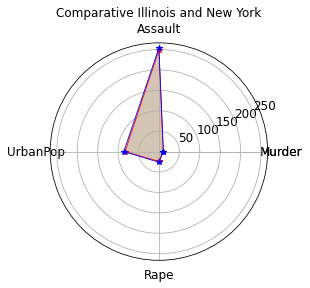

In [12]:
compare_states_radar('Illinois','New York')

**1.4** Implementa el algoritmo k-means e interpreta los resultados

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

1 : 1.8593717116248236
2 : 1.3481045127163296
3 : 1.1669115890618007
4 : 1.0064616373901674
5 : 0.9262977045724641
6 : 0.8823559213072807
7 : 0.8459593945872902
8 : 0.7885311551119432
9 : 0.7446042666888404


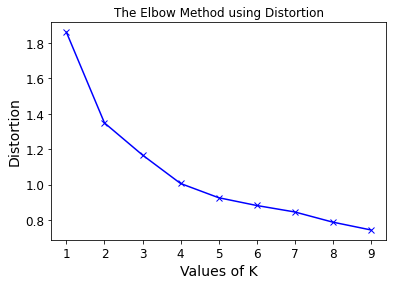

In [14]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 


distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
X=stan.fit_transform(datos)  
for k in K: 
    
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 




1 : 200.0
2 : 104.96163315756873
3 : 80.08569526137276
4 : 57.55425863091106
5 : 49.945945709744464
6 : 43.901765531218516
7 : 41.059367175984804
8 : 37.41278647891281
9 : 31.533206522577295


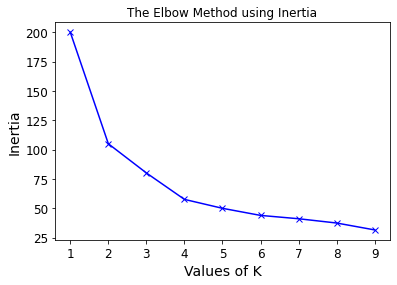

In [15]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [16]:
kmeanModel = KMeans(n_clusters=4).fit(X) 
kmeanModel.fit(X) 

KMeans(n_clusters=4)

In [17]:
datos['Cluster'] = kmeanModel.predict(X)

In [18]:
datos.groupby('Cluster').mean('UrbanPop')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,10.815385,257.384615,76.000000,33.192308
1,3.600000,78.538462,52.076923,12.176923
2,5.656250,138.875000,73.875000,18.781250
3,13.937500,243.625000,53.750000,21.412500


### 2. Scouting deportivo

Se ha lesionado Gerard Moreno. El entrenador del Villarreal necesita una lista de jugadores similares para sustituirle.  

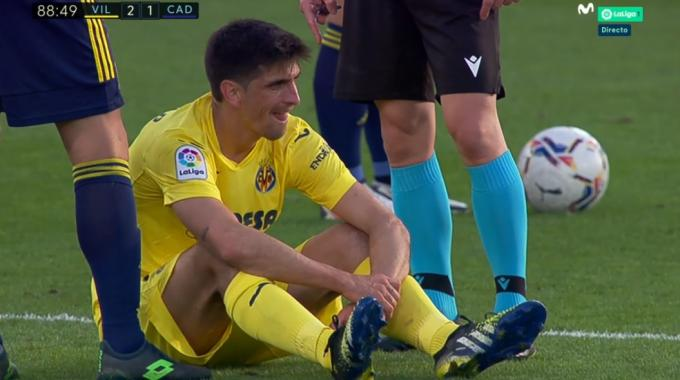


Utilizando el dataset proporcionado:
1. Busca la posición de Gerard y filtra el dataset para obtener los jugadores de la misma demarcación
2. Selecciona solo las variables numéricas y excluye las relacionadas con los porteros (goalkeeping_XXX)
3. Implementa un algoritmo k-means con el número de clusters adecuado
4. Obtén un dataframe con los jugadores que entren en el mismo cluster que Gerard, y ordénalos de mayor a menor valor de mercado

In [19]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [20]:
df = pd.read_csv('data_clustering/players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [21]:
df.loc[df.short_name.str.contains('Gerard Moreno')].team_position

367    ST
Name: team_position, dtype: object

In [22]:
df2=df.loc[df.team_position =='ST']
Jugador_id =df2.loc[df2.short_name.str.contains('Gerard Moreno')].index

old_id = np.array(df2.index)
Jugador_id[0]

367

In [23]:
len(old_id)

458

In [24]:
df2.shape

(458, 104)

In [25]:
df3=df2._get_numeric_data()

In [26]:
searchfor = ['gk', 'goalke']
borrar = df3.columns[df3.columns.str.contains('|'.join(searchfor))]
df3=df3.drop(borrar, axis =1)
#df3=df3.drop('sofifa_id',axis =1) OJO borra en el ultimo
df3.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'de

In [27]:
# comprobar Nan
nan_cols=df3.isna().sum()

nan_cols[nan_cols>0]  # columnas con nulos

df3=df3.drop('nation_jersey_number',axis=1)
df3['release_clause_eur'].fillna(df3['release_clause_eur'].mean(), inplace = True)



In [28]:
#Ver correlacion
colineales=[]

for c in df3:  # recorre las columnas del df
    
    for i in range(len(df3.corr())): # recorre las filas de la matriz de correlacion
        
        if abs(df3.corr()[c][i])>0.9 and abs(df3.corr()[c][i])<1:
            
            colineales.append(c)  # añado la columna que voy a borrar
colineales=list(set(colineales))
colineales

['pace',
 'skill_dribbling',
 'movement_acceleration',
 'value_eur',
 'attacking_finishing',
 'shooting',
 'movement_sprint_speed',
 'overall',
 'dribbling',
 'release_clause_eur',
 'mentality_positioning']

In [29]:
#df3=df3.drop(colineales,axis=1)
df3.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle'

In [30]:
#Ver outlier
stats=df3.describe().T

stats['IQR']=stats['75%'] - stats['25%']
outliers=pd.DataFrame(columns=df3.columns)
for e in stats.index:
    
    iqr=stats.at[e, 'IQR']
    
    cutoff=1.5*iqr
    
    lower=stats.at[e, '25%']-cutoff
    upper=stats.at[e, '75%']+cutoff
    
    results=df3[(df3[e]<lower) | (df3[e]>upper)].copy()
    
    results['outliers']=e
    
    outliers=outliers.append(results, sort=True)
    
outliers['outliers'].value_counts()


international_reputation      73
wage_eur                      50
value_eur                     46
release_clause_eur            44
team_jersey_number            37
power_stamina                 26
movement_acceleration         22
sofifa_id                     17
mentality_penalties           15
movement_sprint_speed         15
movement_agility              14
skill_dribbling               14
pace                          13
skill_ball_control            13
dribbling                     12
movement_balance              12
defending_sliding_tackle      12
power_jumping                 12
defending                     10
power_long_shots              10
defending_standing_tackle     10
physic                        10
shooting                       9
attacking_heading_accuracy     8
movement_reactions             8
age                            8
power_strength                 7
mentality_positioning          7
attacking_volleys              7
overall                        7
attacking_

In [31]:
#Elimino por outliers team_jersey_number 
df3=df3.drop('team_jersey_number',axis=1)
df3=df3.drop('sofifa_id',axis=1)

In [32]:
#Normalizar
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
datos_ajustados=scaler.fit_transform(df3) 

In [33]:
datos_ajustados.shape

(458, 47)

1 : 6.456883422272974
2 : 5.7717247734445065
3 : 5.486594437182257
4 : 5.265541091204031
5 : 5.126491698915212
6 : 5.015607727279924
7 : 4.921318060358828
8 : 4.85202455675852
9 : 4.782627432381542


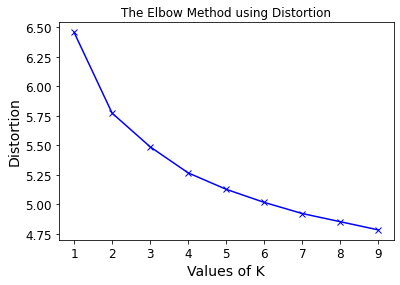

In [34]:
#numero cluster

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 


distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
X=datos_ajustados  
for k in K: 
    
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


1 : 21525.999999999978
2 : 16515.215606248792
3 : 14814.602577821901
4 : 13544.564740306387
5 : 12698.433130908463
6 : 12147.985388599309
7 : 11679.969533461252
8 : 11340.43464854057
9 : 10943.850635570521


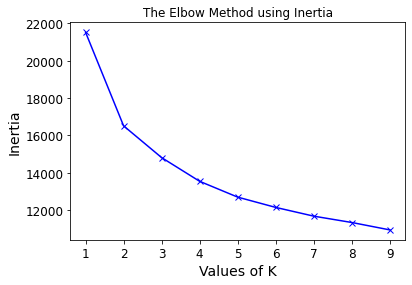

In [35]:
# Usando inercias
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [36]:
#entrenar para k=4
kmeanModel = KMeans(n_clusters=4).fit(X) 
kmeanModel.fit(X) 


KMeans(n_clusters=4)

In [37]:
#etiquetas
df3['Cluster'] = kmeanModel.predict(X)
df3['old_id']= old_id

In [76]:
# busqueda de G.Moreno y personla de su claster
Cluster_buscado=int(df3.loc[df3['old_id']==Jugador_id[0]].Cluster)

personal_buscado =df3[df3['Cluster']== Cluster_buscado]
list_old_ind=list(personal_buscado['old_id'])
list_old_ind.remove(Jugador_id[0]) # quitamos al jugador a relevar
personal_buscado_nombres =df.iloc[list_old_ind]

propuesta = personal_buscado_nombres.sort_values('value_eur',ascending= False)

propuesta[['short_name','value_eur']][:10]


,short_name,value_eur
12,H. Kane,83000000
20,R. Lewandowski,64500000
17,S. Agüero,60000000
19,L. Suárez,53000000
34,E. Cavani,47000000
72,A. Lacazette,46000000
71,C. Immobile,44500000
163,A. Martial,34500000
183,Borja Iglesias,32500000
186,Paco Alcácer,32000000


In [74]:
#comprobar si los cluster son buenos: volumen, diferentes
df3[df3['Cluster']==1]


,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,Cluster,old_id
12,25,188,89,89,91,83000000,220000,3,4,3,159800000.0,2024.0,70.0,91.0,79.0,81.0,47.0,83.0,75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,1,12
17,31,173,70,89,89,60000000,300000,4,4,4,111000000.0,2021.0,80.0,90.0,77.0,88.0,33.0,74.0,70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,1,17
19,32,182,86,89,89,53000000,355000,5,4,3,108700000.0,2021.0,73.0,89.0,80.0,84.0,51.0,84.0,78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,1,19
20,30,184,80,89,89,64500000,235000,4,4,4,106400000.0,2021.0,77.0,87.0,74.0,85.0,41.0,82.0,62,88,85,82,88,85,77,85,65,88,77,77,78,90,82,87,84,78,84,84,81,39,91,77,86,86,34,42,19,1,20
34,32,185,77,88,88,47000000,195000,4,4,3,87000000.0,2020.0,75.0,86.0,72.0,79.0,55.0,83.0,70,88,89,78,90,79,77,76,52,81,74,76,74,91,59,88,88,91,79,79,84,54,93,77,85,80,57,48,39,1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,33,181,72,75,75,4200000,26000,2,3,3,8400000.0,2020.0,75.0,73.0,68.0,75.0,43.0,71.0,69,75,75,69,72,75,71,70,60,74,75,75,76,73,74,73,88,77,73,71,54,44,76,69,69,74,41,38,33,1,1917
1937,34,183,73,75,75,3500000,16000,2,4,3,7000000.0,2020.0,61.0,77.0,66.0,74.0,38.0,66.0,63,79,70,72,74,73,75,59,58,76,76,49,77,77,71,79,70,69,70,75,51,30,77,65,70,74,57,19,19,1,1937
2206,24,193,88,74,80,8000000,1000,1,4,4,19200000.0,2023.0,67.0,72.0,73.0,73.0,37.0,76.0,54,73,73,81,77,73,70,74,73,82,65,68,71,65,34,78,68,66,92,61,49,21,67,80,82,78,36,41,21,1,2206
2593,30,186,78,74,74,5000000,8000,1,3,3,7500000.0,2024.0,51.0,72.0,69.0,70.0,66.0,83.0,56,70,72,73,56,70,68,76,73,71,54,48,64,79,62,78,85,91,83,76,74,64,73,69,64,71,67,66,57,1,2593


## 3. Segmentación de clientes

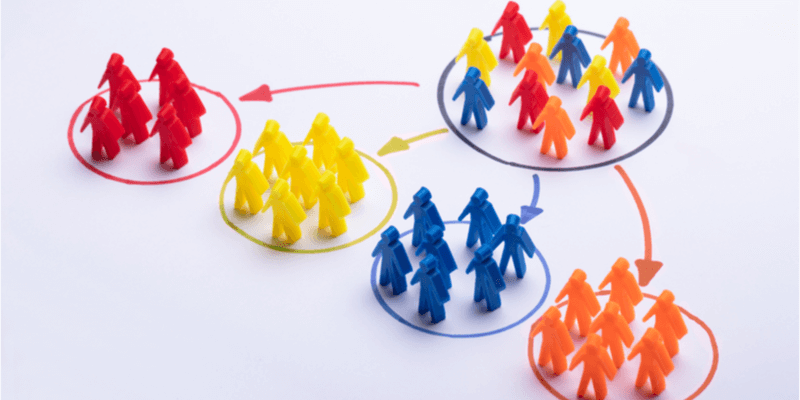

El siguiente dataset contiene información acerca del gasto de clientes en diferentes productos (frescos, leche, comestibles, congelados, detergentes y delicatessen). Se quieren diseñar diversas campañas publicitarias en función de los grupos homogéneos que se encuentren. ¡Encuéntralos!

Utiliza k-means y cluster jerárquico.

¿Cuál es la proporción de clientes en cada cluster?

Utiliza PCA con dos componentes para visualizar los clusters en un gráfico de 2 dimensiones e interpreta los resultados

In [80]:
data = pd.read_csv('data_clustering/customers.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [81]:
# columnas numericas

df1=data._get_numeric_data()

In [82]:
# Valores nulos
nan_cols=df1.isna().sum()

nan_cols[nan_cols>0]  # columnas con nulos


Series([], dtype: int64)

In [83]:
# colinealidad
colineales=[]

for c in df1:  # recorre las columnas del df
    
    for i in range(len(df1.corr())): # recorre las filas de la matriz de correlacion
        
        if abs(df1.corr()[c][i])>0.9 and abs(df1.corr()[c][i])<1:
            
            colineales.append(c)  # añado la columna que voy a borrar
colineales=list(set(colineales))
colineales

['Detergents_Paper', 'Grocery']

In [84]:
df1=df1.drop(colineales,axis=1)

In [85]:
#Ver outlier
stats=df1.describe().T

stats['IQR']=stats['75%'] - stats['25%']
outliers=pd.DataFrame(columns=df1.columns)
for e in stats.index:
    
    iqr=stats.at[e, 'IQR']
    
    cutoff=1.5*iqr
    
    lower=stats.at[e, '25%']-cutoff
    upper=stats.at[e, '75%']+cutoff
    
    results=df1[(df1[e]<lower) | (df1[e]>upper)].copy()
    
    results['outliers']=e
    
    outliers=outliers.append(results, sort=True)
    
outliers['outliers'].value_counts()


Frozen        43
Milk          28
Delicassen    27
Fresh         20
Name: outliers, dtype: int64

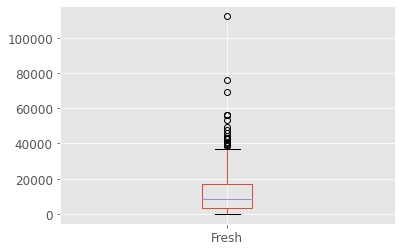

In [86]:
df1[['Fresh']].boxplot();

In [87]:
clean_index=[i for i in df1.index if i not in outliers.index]  # selecciono los indices del df que no estan en outlier
df2=df1.iloc[clean_index]  # selecciona en el df esos indices, los que NO son outliers

In [88]:
#Normalizar
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
datos_ajustados=scaler.fit_transform(df2)
Columnas=df2.columns
Columnas

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Frozen', 'Delicassen'], dtype='object')

1 : 2094.000000000001
2 : 1549.372477650026
3 : 1307.5164384433435
4 : 1121.3291049513143
5 : 1008.9823153562212
6 : 899.7934446951152
7 : 834.1861354412947
8 : 783.1946501798826
9 : 735.1079340567054


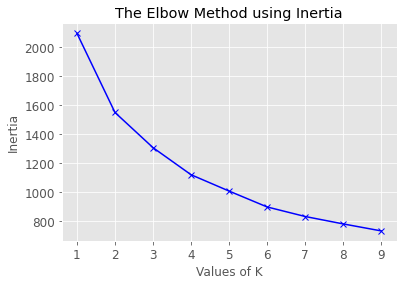

In [89]:
#numero cluster

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 


distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
X=datos_ajustados  
for k in K: 
    
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


# Usando inercias
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [90]:
# Cluster = 2. Ajuste modelo
kmeanModel = KMeans(n_clusters=2).fit(X) 
kmeanModel.fit(X) 


KMeans(n_clusters=2)

In [91]:
df1['Cluster'] = kmeanModel.predict(df1)

In [92]:
df1.groupby('Cluster').count()

,Channel,Region,Fresh,Milk,Frozen,Delicassen
Cluster,,,,,,
0,181,181,181,181,181,181
1,259,259,259,259,259,259


In [93]:
df1.groupby('Cluster').mean()

,Channel,Region,Fresh,Milk,Frozen,Delicassen
Cluster,,,,,,
0,1.038674,2.497238,17831.801105,2053.082873,4788.674033,1146.928177
1,1.521236,2.575290,7925.000000,8412.158301,1872.200772,1788.992278


In [94]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale

In [95]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [96]:
X_scaled = scale(df2)
hclust = AgglomerativeClustering(n_clusters=None, distance_threshold = 0)

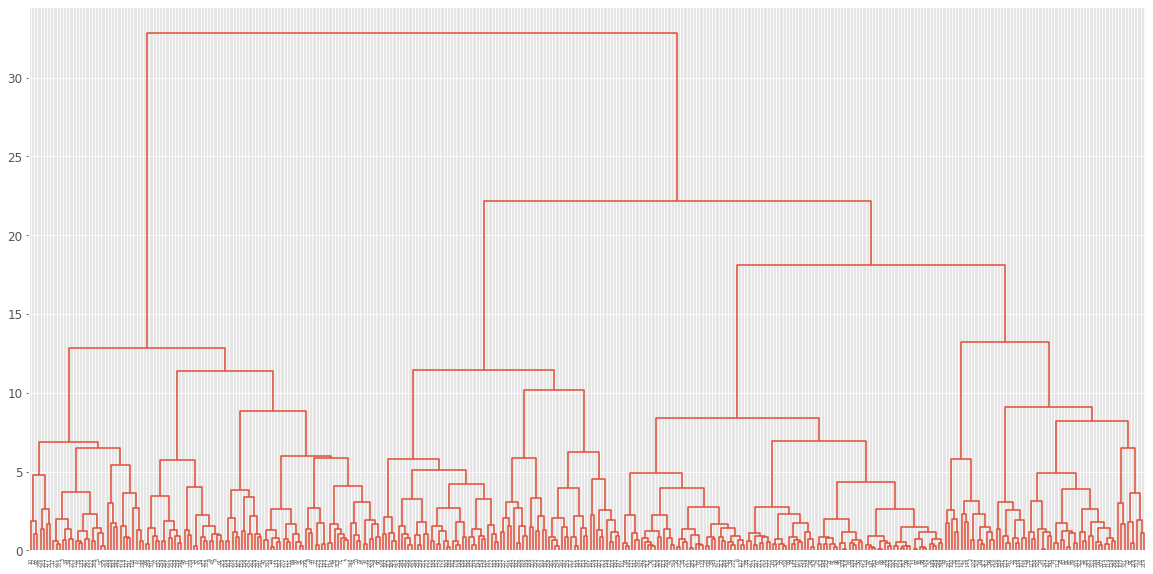

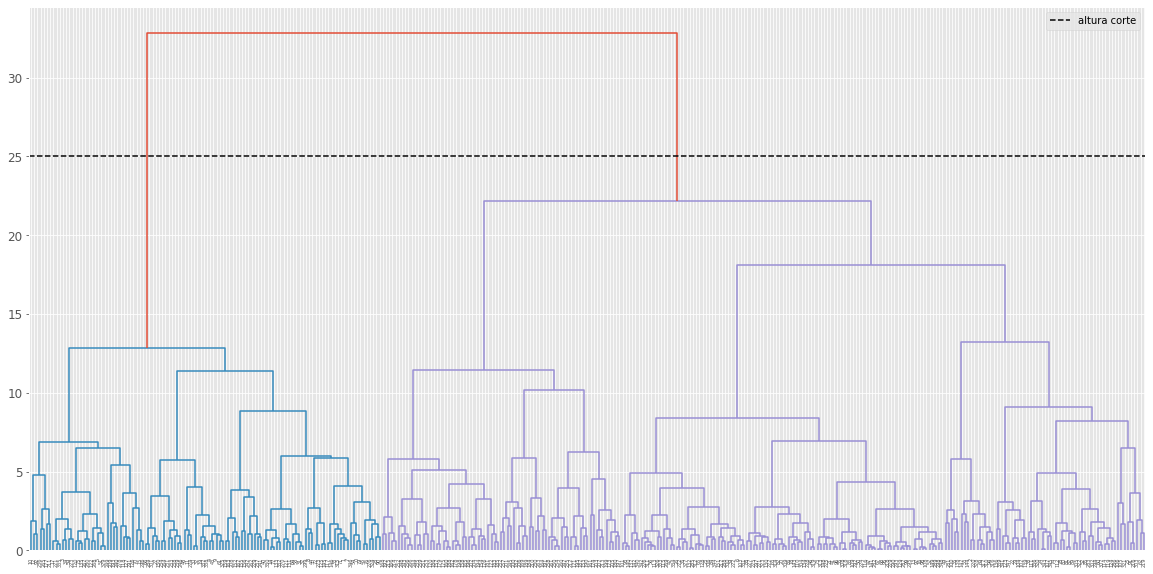

In [97]:
# Dendograma
hclust.fit(X_scaled)
fig, ax = plt.subplots(1,1,figsize=(20,10))
plot_dendrogram(hclust,color_threshold=0)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
altura_corte = 25
plot_dendrogram(hclust, color_threshold=altura_corte, ax=ax)
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

In [98]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [106]:
 #Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca =PCA(n_components=2)
#pca_pipe = make_pipeline(StandardScaler(), PCA())
modelo_pca=pd.DataFrame(pca.fit_transform(datos_ajustados))



In [108]:
pd.DataFrame(
    data    = pca.components_,
    columns = Columnas,
    index   = ['PC1', 'PC2']
)

,Channel,Region,Fresh,Milk,Frozen,Delicassen
PC1,0.626752,0.125658,-0.172619,0.621970,-0.283789,0.306941
PC2,0.002073,-0.043028,0.639274,0.112837,0.480265,0.588291


,0,1
0,2.203769,0.170577
1,2.251858,0.484804
2,-1.473159,2.037370
3,2.000463,0.079029
4,0.772573,-0.561532
...,...,...
344,-0.192853,-0.421567
345,-0.471039,0.088914
346,3.319450,0.939137
347,-0.245720,0.535611


In [110]:
km = KMeans(n_clusters=2, random_state = 42).fit(datos_ajustados)

In [111]:
modelo_pca['Cluster']= km.labels_

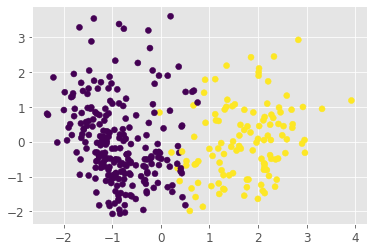

In [112]:
plt.scatter(modelo_pca[0], modelo_pca[1], c=modelo_pca['Cluster'])